# **Vibrating Waves (2D waves)**

## Wave equation

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
%matplotlib notebook

In [18]:
# Ondas en el plano XY

def rect_wave(dx,dt,xf,yf,tf,c,CI):
    nx = int(xf/dx) + 1
    ny = nx
    nt = int(tf/dt) + 1
    
    x = np.linspace(0,xf,nx,endpoint=True)
    y = np.linspace(0,yf,ny,endpoint=True)
    z = np.zeros((nt,ny,nx)) # z(t,y,x)
    
    for j in range(ny):
        for i in range(nx):
            z[0,j,i] = CI(x[i],y[j])
    
    C = c*(dt/dx)
    
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            z[1,j,i] = z[0,j,i] + 0.5*C**2*(z[0,j,i+1] + z[0,j,i-1] - 4*z[0,j,i] + z[0,j+1,i] + z[0,j-1,i])
    
    for k in range(1,nt-1):
        for j in range(1,ny-1):
            for i in range(1,nt-1):
                z[k+1,j,i] = 2*z[k,j,i] - z[k-1,j,i] + C**2*(z[k,j,i+1]+z[k,j,i-1]-4*z[k,j,i]+z[k,j+1,i]+z[k,j-1,i])
    
    return z

In [19]:
def CI(x,y):
    z0 = x*y*(2-x)*(3-y)
    return z0

In [26]:
dx = 1.0e-2
dy = dx
dt = dx/2

xf = 2.0
yf = 3.0
tf = 1.0

c = 1.0

nx = int(xf/dx) + 1
ny = nx

x_2d = np.linspace(0, xf, nx, endpoint = True)
y_2d = np.linspace(0, yf, ny, endpoint = True)

In [21]:
z_rect = rect_wave(dx,dt,xf,yf,tf,c,CI)

In [51]:
z_rect[20,:,:]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0007258 , 0.00145154, ..., 0.00145154, 0.0007258 ,
        0.        ],
       [0.        , 0.00145154, 0.00290294, ..., 0.00290294, 0.00145154,
        0.        ],
       ...,
       [0.        , 0.00145154, 0.00290294, ..., 0.00290294, 0.00145154,
        0.        ],
       [0.        , 0.0007258 , 0.00145154, ..., 0.00145154, 0.0007258 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Animation

In [23]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

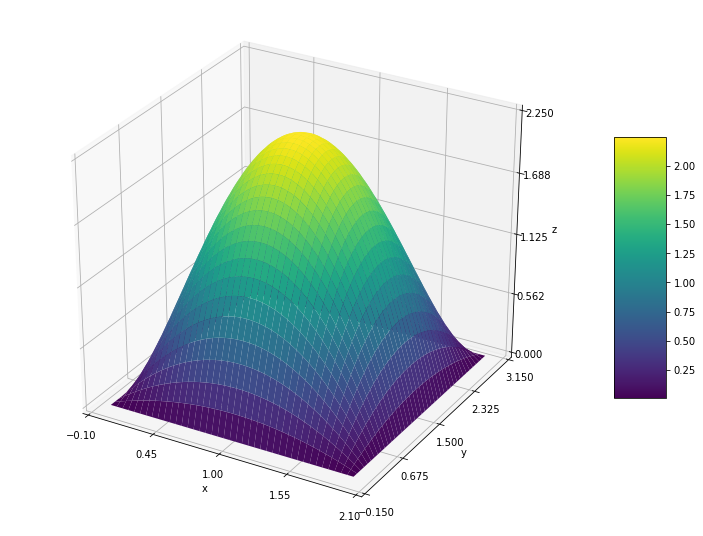

In [57]:
fig = plt.figure(figsize=(6.4*2, 4.8*2))
ax = fig.add_subplot(111, projection = '3d')

X, Y = np.meshgrid(x_2d,y_2d)
    
surf = ax.plot_surface(X,Y,z_rect[0,:,:],cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.tick_params(labelsize=10.0)
ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.yaxis.set_major_locator(ticker.LinearLocator(5))
ax.zaxis.set_major_locator(ticker.LinearLocator(5))
plt.colorbar(surf,shrink=0.5,aspect=5)
plt.show()

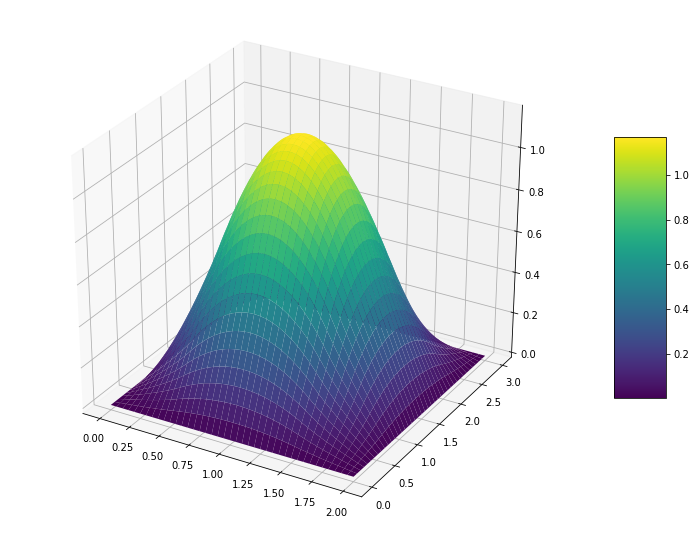

In [60]:
fig1 = plt.figure(figsize=(6.4*2, 4.8*2))
ax1 = fig1.add_subplot(111, projection = '3d')

X, Y = np.meshgrid(x_2d,y_2d)
    
surf1 = ax1.plot_surface(X,Y,z_rect[100,:,:],cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.tick_params(labelsize=10.0)
ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.yaxis.set_major_locator(ticker.LinearLocator(5))
ax.zaxis.set_major_locator(ticker.LinearLocator(5))
plt.colorbar(surf1,shrink=0.5,aspect=5)
plt.show()